## Data Validity and Accuracy Check

In the field of research, good data is like gold, it is hard to find. Data can be a powerful tool if the right procedures are taken in its assembly but for one reason or the other, there is always someone who is looking to tamper with your data. From my experience, one of the simplest techniques to test your data is using Benford's law which is is an observation about the leading digits of the numbers found in real-world data sets. According to the law, it is often the case that 1 occurs more frequently than 2, 2 more frequently than 3, and so on.

In this notebook, I test the law using data obtained from the Kenya National Bureau of Statistics on the Kenyan Population.

In [1]:
!pip install tabula-py

In [2]:
# import libraries
import tabula 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import choices

In [3]:
# load pdf file
filename = "VOLUME III KPHC 2019.pdf"

table1 = tabula.read_pdf(filename, pages=26)
table2 = tabula.read_pdf(filename, pages=27)

t1 = pd.DataFrame(table1[0])
t2 = pd.DataFrame(table2[0])

In [4]:
# preview the table 1
t1

,Age,Male,Female,Intersex,Total
0,Total,"2 3,548,056","24,014,716","1 ,524","47,564,296"
1,0,"5 52,508","5 52,528",3 8,"1,105,074"
2,1,"5 80,856","5 73,920",2 9,"1,154,805"
3,2,"6 14,005","6 10,705",3 3,"1,224,743"
4,3,"6 19,989","6 21,941",2 6,"1,241,956"
...,...,...,...,...,...
56,46,"1 78,394","1 72,948",1 1,"351,353"
57,47,"1 85,808","1 76,586",1 1,"362,405"
58,48,"1 32,797","1 25,840",1 1,"258,648"
59,49,"1 52,594","1 46,924",3,"299,521"


In [5]:
# preview table 2
t2

,Age,Male,Female,Intersex,Total
0,50,"1 95,078","1 94,961",2 4,"390,063"
1,51,"1 35,462","1 32,506",7,"267,975"
2,52,"1 24,802","1 18,504",5,"243,311"
3,53,"94,804","9 4,023",2,"188,829"
4,54,"1 12,835","1 05,591",6,"218,432"
...,...,...,...,...,...
57,98,"1,137","2 ,026",-,"3,163"
58,99,"1,856","4 ,734",-,"6,590"
59,95-99,"9,770","1 8,236",-,"28,006"
60,100+,"3,876","1 0,164",-,"14,040"


In [6]:
print('Shape for table1', t1.shape)
print('Shape for table2', t2.shape)

Shape for table1 (61, 5)
Shape for table2 (62, 5)


In [7]:
# concat the two tables
age_pop = pd.concat([t1, t2])
age_pop.shape

(123, 5)

In [8]:
# check data types
age_pop.dtypes

Age         object
Male        object
Female      object
Intersex    object
Total       object
dtype: object

In [9]:
# remove white space
cols = ['Age', 'Male', 'Female', 'Intersex', 'Total']

for c in cols:
  age_pop[c] = age_pop[c].str.replace(' ', '')
  age_pop[c] = age_pop[c].str.replace(',', '')

age_pop

,Age,Male,Female,Intersex,Total
0,Total,23548056,24014716,1524,47564296
1,0,552508,552528,38,1105074
2,1,580856,573920,29,1154805
3,2,614005,610705,33,1224743
4,3,619989,621941,26,1241956
...,...,...,...,...,...
57,98,1137,2026,-,3163
58,99,1856,4734,-,6590
59,95-99,9770,18236,-,28006
60,100+,3876,10164,-,14040


In [10]:
# drop range values in Age column
range_vals = age_pop[age_pop['Age'].str.contains('-')]
print(age_pop.shape)
age_pop = age_pop[~age_pop.isin(range_vals)].dropna()
print(age_pop.shape)

(123, 5)
(103, 5)


In [11]:
# remove Total and NotStated rows
age_pop = age_pop.iloc[1:-1, :]
age_pop.reset_index(inplace=True, drop=True)
age_pop

,Age,Male,Female,Intersex,Total
0,0,552508,552528,38,1105074
1,1,580856,573920,29,1154805
2,2,614005,610705,33,1224743
3,3,619989,621941,26,1241956
4,4,638986,627675,28,1266689
...,...,...,...,...,...
96,96,1467,2631,-,4098
97,97,1963,2799,-,4762
98,98,1137,2026,-,3163
99,99,1856,4734,-,6590


In [12]:
# drop intersex column due to missing values
age_pop.drop('Intersex', axis=1, inplace=True)
age_pop

,Age,Male,Female,Total
0,0,552508,552528,1105074
1,1,580856,573920,1154805
2,2,614005,610705,1224743
3,3,619989,621941,1241956
4,4,638986,627675,1266689
...,...,...,...,...
96,96,1467,2631,4098
97,97,1963,2799,4762
98,98,1137,2026,3163
99,99,1856,4734,6590


In [13]:
# get first digit from string
age_pop['male first'] = age_pop['Male'].astype(str).str[0]
age_pop['female first'] = age_pop['Female'].astype(str).str[0]
age_pop

,Age,Male,Female,Total,male first,female first
0,0,552508,552528,1105074,5,5
1,1,580856,573920,1154805,5,5
2,2,614005,610705,1224743,6,6
3,3,619989,621941,1241956,6,6
4,4,638986,627675,1266689,6,6
...,...,...,...,...,...,...
96,96,1467,2631,4098,1,2
97,97,1963,2799,4762,1,2
98,98,1137,2026,3163,1,2
99,99,1856,4734,6590,1,4


In [14]:
age_pop['male first'] = age_pop['male first'].astype(int)
age_pop['female first'] = age_pop['female first'].astype(int)

In [15]:
#specify ;eading digits
population = [1, 2, 3, 4, 5, 6, 7, 8, 9]

#Specify the Benford Law weights)
weights = [0.301, 0.176, 0.124, 0.096, 0.079, 0.066, 0.057, 0.054, 0.047]

#generate sample first_digit set with Benford disctibution
first_digits = choices(population, weights, k=101)

age_pop["Benford's data"] = first_digits

In [16]:
male = age_pop['male first'].value_counts()
female = age_pop['female first'].value_counts()
benford = age_pop["Benford's data"].value_counts()
columns = ['Index', 'Male', 'Female', 'Benford']
index = range(1,10)

ta = pd.DataFrame([index, male.values, female.values, benford.values]).transpose()
ta.columns = columns
ta

,Index,Male,Female,Benford
0,1,25,25,26
1,2,16,20,16
2,3,15,14,14
3,4,13,13,9
4,5,11,11,9
5,6,9,10,8
6,7,5,4,8
7,8,4,2,7
8,9,3,2,4


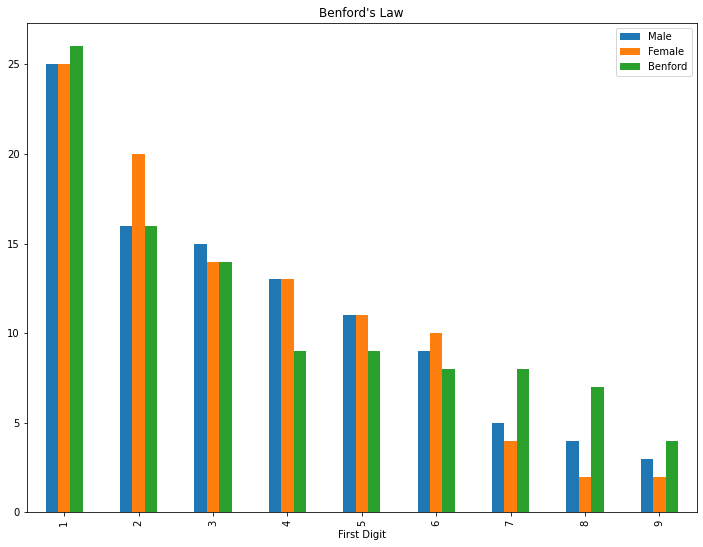

In [20]:
# plot distribution
ta[['Index', 'Male', 'Female', 'Benford']].plot(x='Index', kind='bar', figsize=(12,9))
plt.xlabel('First Digit')
plt.title("Benford's Law")
plt.show()

Although not perfectly, the data I obtained on the Kenyan population in relation to the different age groups fits Benford's law judging by the distribution of first digits. Kudos to the Kenya National Bureau of Statistics for credible data collection and reporting.